In [1]:
import numpy as np
import math
import MDAnalysis
import nglview as nv

Load pdb structure file 1axc.pdb for human DNA polymerase into MDAnalysis. 

In [2]:
u = MDAnalysis.Universe('../data/1axc.pdb')
protein = u.select_atoms("protein") 

We can view the structure using nglview widgets. Notice that the structure contains both alpha helix and beta sheet secondary structure.

In [3]:
import ipywidgets
v = nv.show_mdanalysis(protein)
v.clear_representations()
v.add_representation('cartoon')
v.add_representation('licorice', selection='not hydrogen')
v

A Jupyter Widget

We can compute the Ramachandran plot using MDAnalysis and display the plot using matplotlib in python

In [6]:
from MDAnalysis.analysis.dihedrals import Ramachandran
R = Ramachandran(protein).run()

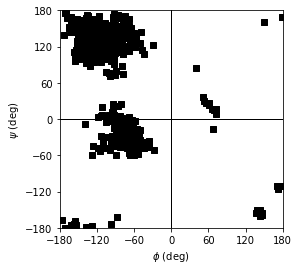

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=plt.figaspect(1))
R.plot(ax=ax, color='k', marker='s')

Let's now look at a particular region of interest from residues 10-20. We can compute the phi and psi angles as follows

In [8]:
# selection of atomgroups
phi_atoms = [res.phi_selection() for res in u.residues[10:20]]
psi_atoms = [res.psi_selection() for res in u.residues[10:20]]
from MDAnalysis.analysis.dihedrals import Dihedral
phi = Dihedral(phi_atoms).run()
psi = Dihedral(psi_atoms).run()
print 'phi angles: ',phi.angles
print 'psi angles: ',psi.angles

phi angles:  [[ -46.11310503  -73.52457445  -64.67038433  -59.07386406  -60.86471558
   -73.11855494  -72.61312093  -79.42212327 -104.91596453  -36.13782751]]
psi angles:  [[-48.01572182 -30.629881   -54.43666111 -39.24427906 -42.63735266
  -34.0537926  -23.59171725 -21.49787754 -48.03991432 -36.57440757]]


Based on the phi and psi angles what do you think is the secondary structure of this region?

Let's see where these angles lie on a Ramachandran plot

In [9]:
protein_regionA = u.residues[10:20]

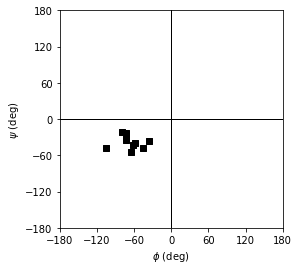

In [10]:
R_regionA = Ramachandran(protein_regionA).run()
fig, ax = plt.subplots(figsize=plt.figaspect(1))
R_regionA.plot(ax=ax, color='k', marker='s')

Finally, let's display this region. We see clearly the secondary structure for this region is a right-handed alpha helix.

In [11]:
v_regionA = nv.show_mdanalysis(protein_regionA)
v_regionA

A Jupyter Widget